Create a new model, train it and evaluate it on the test set.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import dataset
import predict

Load existing data

In [2]:
data = pd.read_csv('data/EPL_processed_results.csv', index_col=0)

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = dataset.generate_train_val_test_sets(data)

Create new model

In [4]:
predictor = predict.Predictor()
predictor.load_train_val(X_train, y_train, X_val, y_val)

In [8]:
predictor.get_model(random_seed=42)

In [9]:
print(predictor.model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 15)               31        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                256       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 338
Trainable params: 307
Non-trainable params: 31
_________________________________________________________________
None


Train the model on the train set and save the model

Epoch 1/100
89/89 [==============================] - 1s 6ms/step - loss: 1.3488 - accuracy: 0.3691 - val_loss: 1.0603 - val_accuracy: 0.4585
Epoch 2/100
89/89 [==============================] - 0s 4ms/step - loss: 1.1451 - accuracy: 0.4303 - val_loss: 1.0287 - val_accuracy: 0.4796
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.4525 - val_loss: 1.0186 - val_accuracy: 0.5091
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 1.0743 - accuracy: 0.4602 - val_loss: 1.0141 - val_accuracy: 0.5190
Epoch 5/100
89/89 [==============================] - 0s 4ms/step - loss: 1.0637 - accuracy: 0.4673 - val_loss: 1.0115 - val_accuracy: 0.5302
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.4683 - val_loss: 1.0083 - val_accuracy: 0.5373
Epoch 7/100
89/89 [==============================] - 0s 5ms/step - loss: 1.0409 - accuracy: 0.4838 - val_loss: 1.0064 - val_accuracy: 0.5401
Epoch 8/100
8

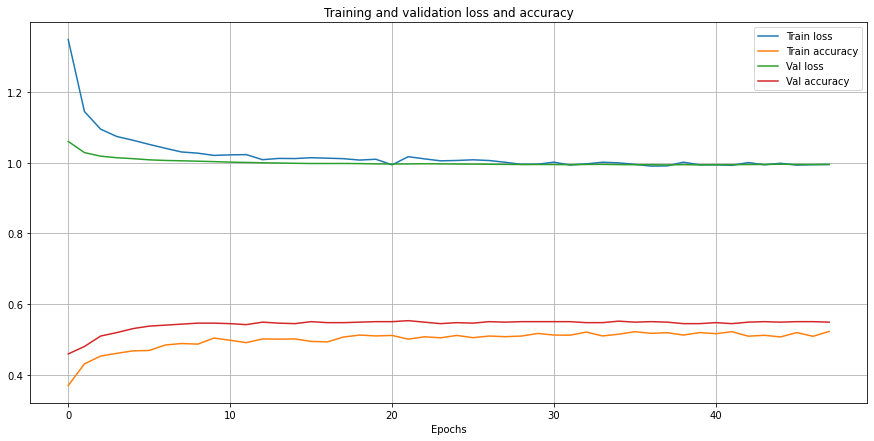

INFO:tensorflow:Assets written to: model/assets
Model saved in model


In [10]:
predictor.train(plot=True, save_model=True)